<a href="https://colab.research.google.com/github/Jin-Dam/data-analysis-project/blob/main/%F0%9F%9A%97_%EB%AC%B4%EC%97%87%EC%9D%B4_%EC%B9%B4%EC%8B%9C%ED%8A%B8_%ED%8C%90%EB%A7%A4%EB%9F%89%EC%9D%84_%EA%B2%B0%EC%A0%95%ED%95%98%EB%8A%94%EA%B0%80%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 코랩 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기
url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv'
df = pd.read_csv(url)
df = df.drop(df.columns[0], axis=1) # 불필요한 첫 번째 열 삭제

print("데이터 준비 완료. 총", len(df), "개의 데이터가 있습니다.")
print(df.head())

데이터 준비 완료. 총 400 개의 데이터가 있습니다.
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [ ]:
# 1. 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum

# 2. 폰트 캐시 재생성
!sudo fc-cache -fv

# 3. matplotlib 캐시 삭제
!rm ~/.cache/matplotlib -rf

print("설치 완료! ctrl + M .")

# 데이터 탐색

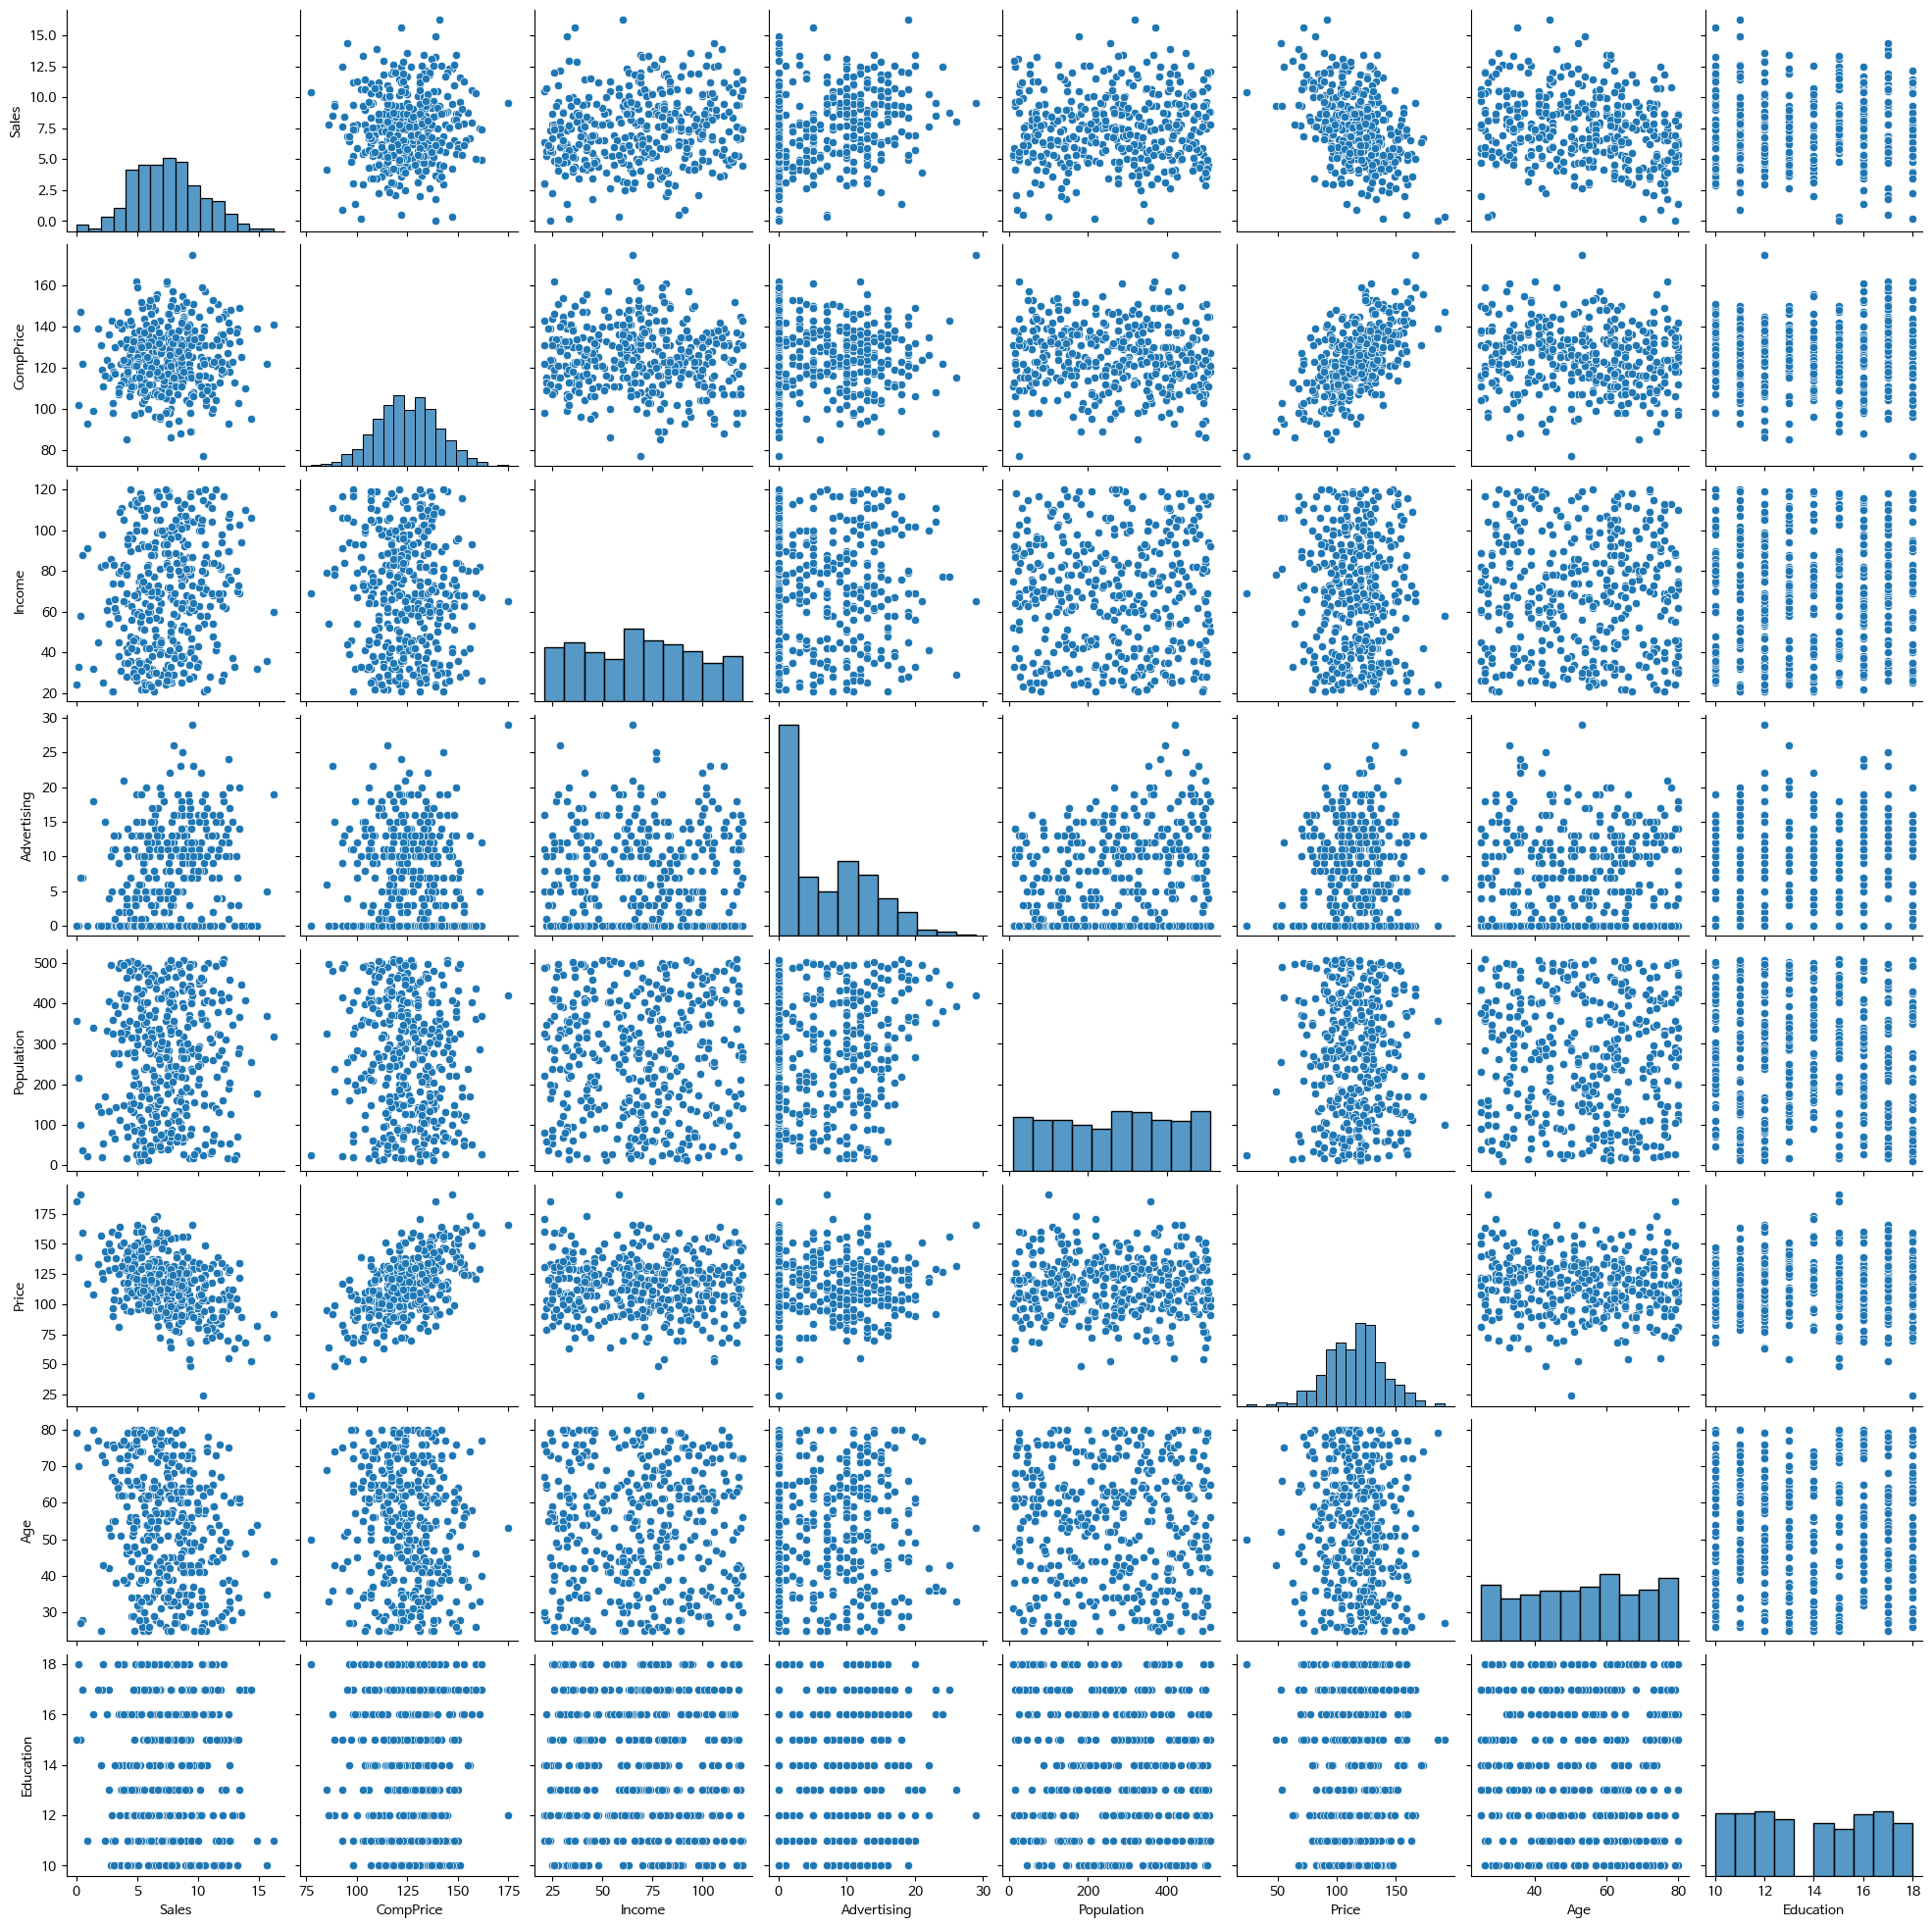

In [37]:
# 모든 숫자 변수 간 관계
sns.pairplot(df)
plt.show()

# 부유한 동네에서는 비싸게 팔아도 괜찮을까?

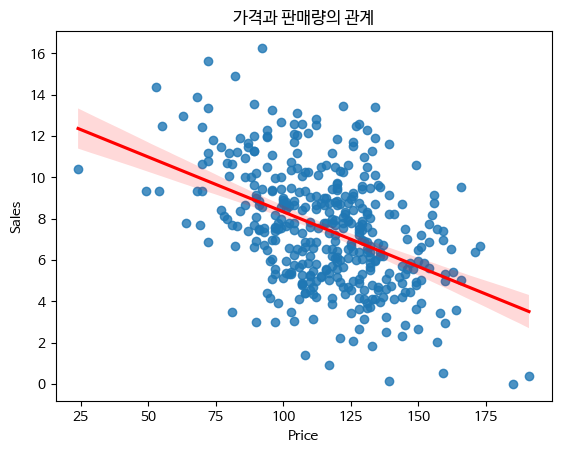

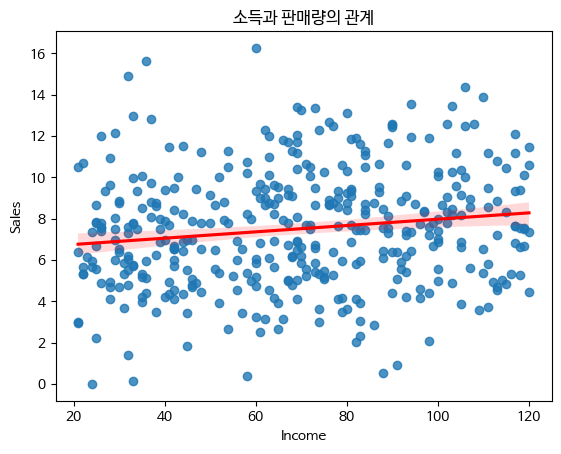

In [ ]:
# 가격과 판매량의 관계
sns.regplot(x='Price', y='Sales', data=df, line_kws={'color':'red'})
plt.title('가격과 판매량의 관계')
plt.show()

# 소득과 판매량의 관계
sns.regplot(x='Income', y='Sales', data=df, line_kws={'color':'red'})
plt.title('소득과 판매량의 관계')
plt.show()

In [ ]:
# 모델 1: Price 변수 하나만 사용
model1 = smf.ols('Sales ~ Price', data=df).fit()

print("--- 모델 1 (Price) 결과 ---")
print(model1.summary())

--- 모델 1 (Price) 결과 ---
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           7.62e-21
Time:                        06:41:59   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6419      0

In [ ]:
# 모델 2: Price와 Income 변수를 함께 사용
model2 = smf.ols('Sales ~ Price + Income', data=df).fit()

print("\n--- 모델 2 (Price + Income) 결과 ---")
print(model2.summary())


--- 모델 2 (Price + Income) 결과 ---
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     54.07
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.70e-21
Time:                        06:42:07   Log-Likelihood:                -934.17
No. Observations:                 400   AIC:                             1874.
Df Residuals:                     397   BIC:                             1886.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.6

In [ ]:
# 모델 3: 상호작용 항(Price * Income) 추가
model3 = smf.ols('Sales ~ Price + Income + Price * Income', data=df).fit()

print("\n--- 모델 3 (상호작용 효과) 결과 ---")
print(model3.summary())


--- 모델 3 (상호작용 효과) 결과 ---
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     35.96
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.43e-20
Time:                        07:19:55   Log-Likelihood:                -934.17
No. Observations:                 400   AIC:                             1876.
Df Residuals:                     396   BIC:                             1892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.68

In [ ]:
# 모델 4: 핵심 변수와 상호작용 항을 모두 포함
final_model = smf.ols('Sales ~ Price + Income + Price*Income + ShelveLoc + Advertising + CompPrice', data=df).fit()

print("--- 최종 모델 결과 ---")
print(final_model.summary())

--- 최종 모델 결과 ---
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     229.4
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.27e-134
Time:                        06:44:01   Log-Likelihood:                -656.64
No. Observations:                 400   AIC:                             1329.
Df Residuals:                     392   BIC:                             1361.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept        

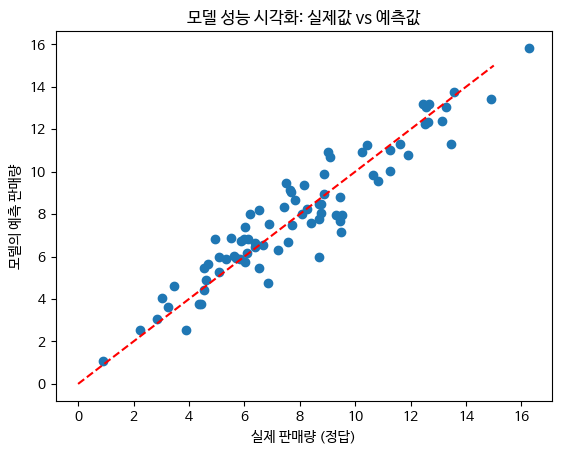

In [ ]:
# scikit-learn으로 모델을 만들고 예측을 수행하는 과정이 필요합니다.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. 데이터 인코딩 및 분리
df_encoded = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)
X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 학습 및 예측
final_model_ml = LinearRegression()
final_model_ml.fit(X_train, y_train)
predictions = final_model_ml.predict(X_test)

# 3. 시각화
plt.scatter(y_test, predictions)
plt.xlabel('실제 판매량 (정답)')
plt.ylabel('모델의 예측 판매량')
plt.title('모델 성능 시각화: 실제값 vs 예측값')
# 완벽한 예측을 나타내는 대각선 추가
plt.plot([0, 15], [0, 15], 'r--')
plt.show()

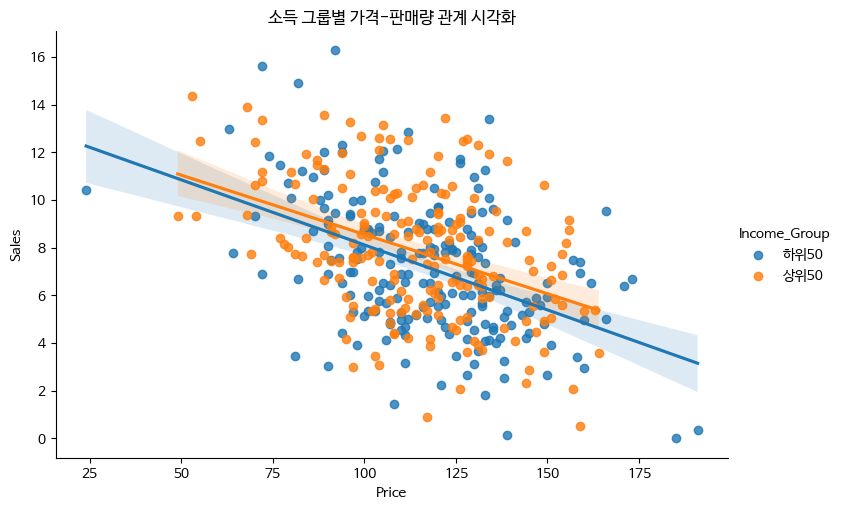

In [ ]:
# 소득을 기준으로 그룹 나누기 (하위 50% vs 상위 50%)
df['Income_Group'] = pd.qcut(df['Income'], 2, labels=['하위50', '상위50'])

# lmplot을 사용해 그룹별 회귀선을 한 번에 그리기
# hue='Income_Group' 옵션이 그룹별로 색상과 그래프를 나눠주는 핵심입니다.
sns.lmplot(x='Price', y='Sales', hue='Income_Group', data=df,
           height=5, aspect=1.5)
plt.title('소득 그룹별 가격-판매량 관계 시각화')
plt.show()

# 광고 효과는 젊은 부모가 많은 지역에서 더 크게 나타날까?

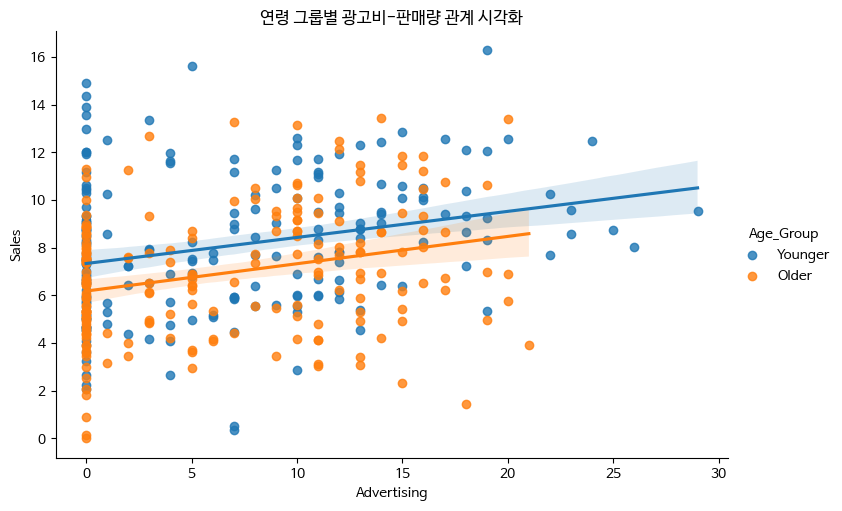

In [24]:
# 'Age'를 기준으로 그룹 나누기 (하위 50% vs 상위 50%)
df['Age_Group'] = pd.qcut(df['Age'], 2, labels=['Younger', 'Older'])

# lmplot을 사용해 그룹별 회귀선을 한 번에 그리기
sns.lmplot(x='Advertising', y='Sales', hue='Age_Group', data=df,
           height=5, aspect=1.5)
plt.title('연령 그룹별 광고비-판매량 관계 시각화')
plt.show()

In [25]:
# 상호작용 효과 모델 실행
model_age_interaction = smf.ols('Sales ~ Advertising + Age + Advertising * Age', data=df).fit()

# 결과 요약표 출력
print(model_age_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     19.00
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.56e-11
Time:                        10:35:28   Log-Likelihood:                -955.45
No. Observations:                 400   AIC:                             1919.
Df Residuals:                     396   BIC:                             1935.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.9424      0.631     

# 교육 수준이 높은 고객들은 가격에 더 민감하게 반응할까?

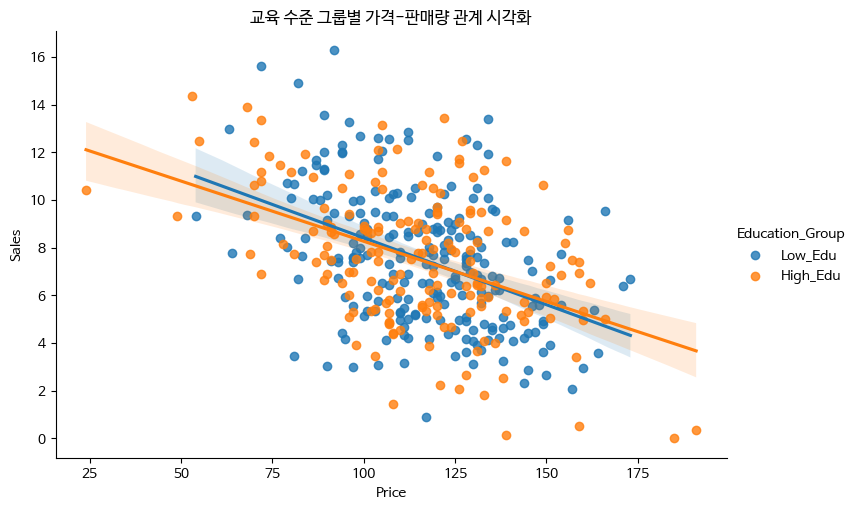

In [26]:
# 'Education'을 기준으로 그룹 나누기
df['Education_Group'] = pd.qcut(df['Education'], 2, labels=['Low_Edu', 'High_Edu'])

# lmplot을 사용해 그룹별 회귀선을 한 번에 그리기
sns.lmplot(x='Price', y='Sales', hue='Education_Group', data=df,
           height=5, aspect=1.5)
plt.title('교육 수준 그룹별 가격-판매량 관계 시각화')
plt.show()

In [27]:
# 상호작용 효과 모델 실행
model_edu_interaction = smf.ols('Sales ~ Price + Education + Price * Education', data=df).fit()

# 결과 요약표 출력
print(model_edu_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     33.51
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.56e-19
Time:                        11:00:21   Log-Likelihood:                -937.11
No. Observations:                 400   AIC:                             1882.
Df Residuals:                     396   BIC:                             1898.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.0189      3.581     

# 최종  모델 선정 및 성능 평가

In [32]:
# 'Advertising'을 기준으로 그룹 나누기
df['Ad_Group'] = pd.qcut(df['Advertising'], 2, labels=['Low_Ad', 'High_Ad'])

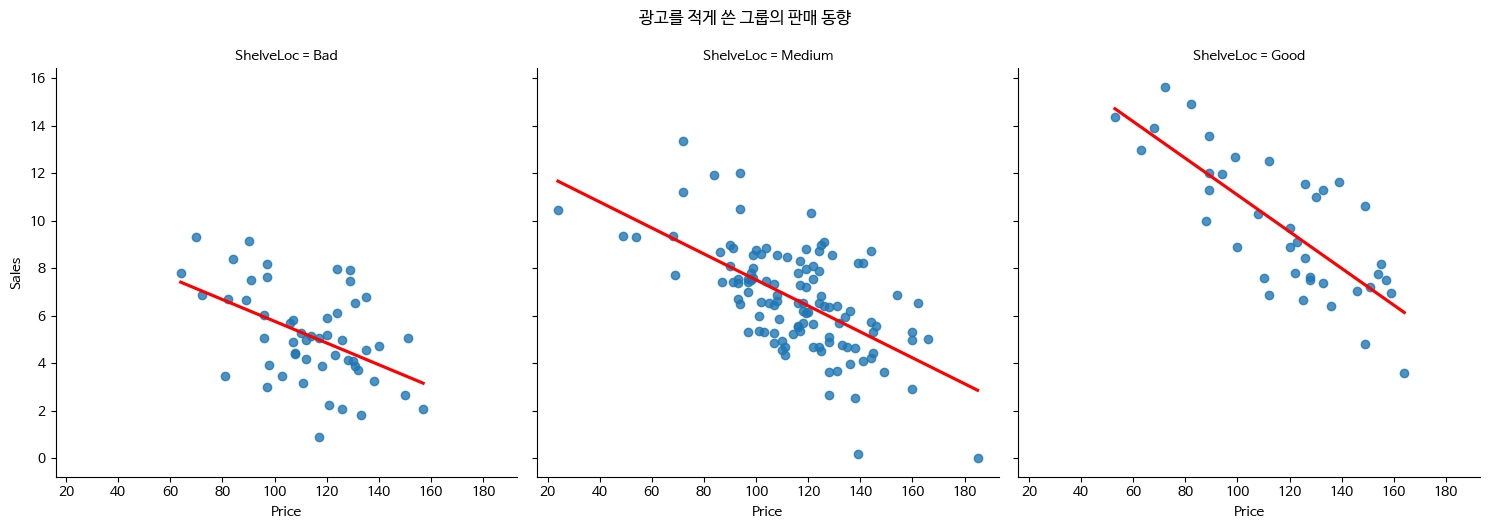

In [33]:
# Low_Ad 그룹만 선택해서 그리기
sns.lmplot(x='Price', y='Sales', col='ShelveLoc', data=df[df['Ad_Group'] == 'Low_Ad'],
           col_order=['Bad', 'Medium', 'Good'], ci=None, line_kws={'color':'red'})
plt.suptitle('광고를 적게 쓴 그룹의 판매 동향', y=1.05) # 전체 그래프의 제목
plt.show()

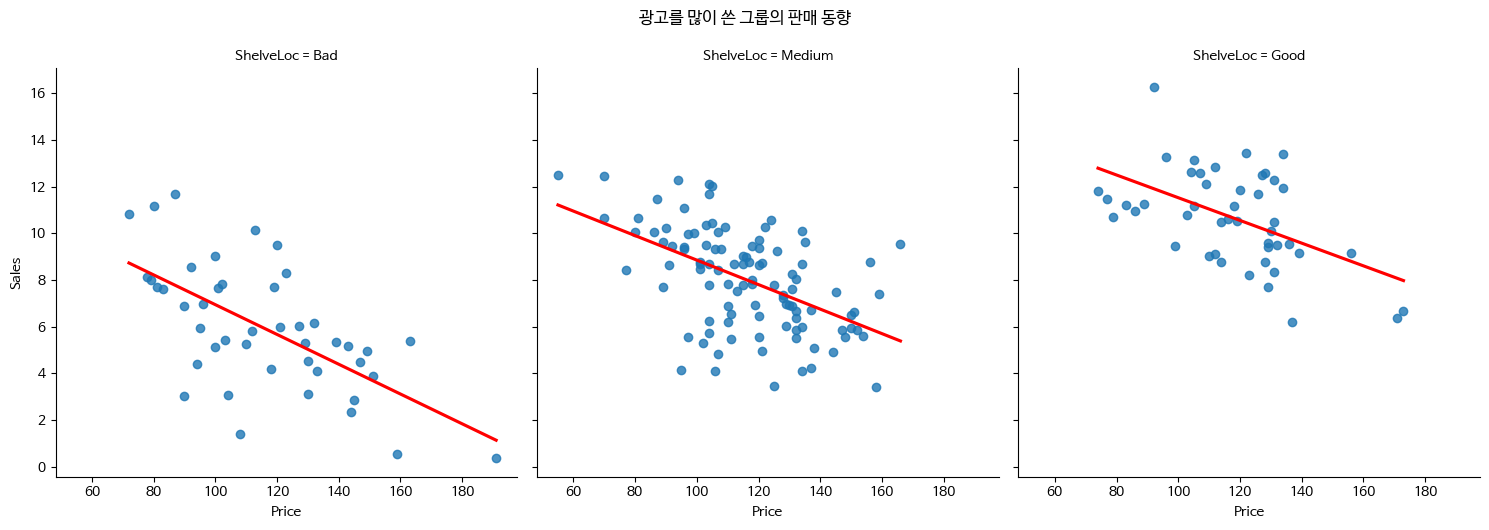

In [34]:
# High_Ad 그룹만 선택해서 그리기
sns.lmplot(x='Price', y='Sales', col='ShelveLoc', data=df[df['Ad_Group'] == 'High_Ad'],
           col_order=['Bad', 'Medium', 'Good'], ci=None, line_kws={'color':'red'})
plt.suptitle('광고를 많이 쓴 그룹의 판매 동향', y=1.05)
plt.show()

1. 단변량 회귀 분석: 가장 강한 변수 하나로 시작하기

In [29]:
# 모델 1: Price 변수 하나만 사용
model_simple = smf.ols('Sales ~ Price', data=df).fit()

print("--- 단변량 모델(Price) 결과 ---")
print(model_simple.summary())

--- 단변량 모델(Price) 결과 ---
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           7.62e-21
Time:                        11:15:09   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6419      

2. 다변량 회귀 분석: 핵심 변수들로 성능 높이기

In [36]:
# 모델 2: Price, CompPrice, ShelveLoc, Advertising 세 변수 사용
model_multiple = smf.ols('Sales ~ Price + CompPrice + ShelveLoc + Advertising', data=df).fit()

print("\n--- 다변량 모델(Price + CompPrice + ShelveLoc + Advertising) 결과 ---")
print(model_multiple.summary())


--- 다변량 모델(Price + CompPrice + ShelveLoc + Advertising) 결과 ---
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     276.5
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.00e-126
Time:                        12:24:43   Log-Likelihood:                -681.12
No. Observations:                 400   AIC:                             1374.
Df Residuals:                     394   BIC:                             1398.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------